## NAME: SUGANDHA NEGI
## Organization: The Sparks Foundation
## Data Science and Buisness Analytics Task-8
## Timeline Analysis : Covid19
- Create a storyboard showing spread of Covid 19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP
- Use animation, timeline and annotations to create attractive and interactive dashboards and story
- Identify interesting patterns and possible reasons helping Covid 19 spread with basic as well as advanced charts

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
sns.set()

In [2]:
#read data 
covid_data=pd.read_csv('owid-covid-data.csv')

## Understanding and analysing the data to understand the data

In [3]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54932 entries, 0 to 54931
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            54616 non-null  object 
 1   continent                           54284 non-null  object 
 2   location                            54932 non-null  object 
 3   date                                54932 non-null  object 
 4   total_cases                         54379 non-null  float64
 5   new_cases                           54189 non-null  float64
 6   new_cases_smoothed                  53233 non-null  float64
 7   total_deaths                        46307 non-null  float64
 8   new_deaths                          46133 non-null  float64
 9   new_deaths_smoothed                 53233 non-null  float64
 10  total_cases_per_million             54063 non-null  float64
 11  new_cases_per_million               53874

In [5]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.437900e+04,5.418900e+04,53233.000000,4.630700e+04,46133.000000,53233.000000,54063.000000,53874.000000,52923.000000,46004.000000,...,52282.000000,35794.000000,52821.000000,53438.000000,41761.000000,41190.000000,26371.000000,48587.000000,54336.000000,52510.000000
mean,2.425533e+05,2.792888e+03,2765.747005,8.662063e+03,72.599701,61.501986,4075.488332,51.041084,50.416721,110.749899,...,19280.315013,13.097251,255.613856,7.754580,10.599482,32.645502,51.226484,3.046715,73.170121,0.716468
std,2.354850e+06,2.541319e+04,24432.979813,6.807290e+04,522.982485,466.558705,8286.297936,157.742025,124.533867,210.007653,...,19702.360893,19.844927,117.791338,3.855546,10.433231,13.448026,31.778767,2.476888,7.549719,0.153782
min,1.000000e+00,-4.607600e+04,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,4.080000e+02,1.000000e+00,4.000000,2.300000e+01,0.000000,0.000000,83.602000,0.057250,0.720000,4.109000,...,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.920000,0.591000
50%,4.123000e+03,3.700000e+01,45.286000,1.300000e+02,1.000000,0.571000,641.476000,4.194000,5.492000,20.434000,...,13111.214000,2.000000,241.219000,7.110000,6.300000,31.400000,50.540000,2.400000,74.620000,0.750000
75%,4.053750e+04,4.180000e+02,450.429000,1.127000e+03,10.000000,7.286000,4036.557000,36.869000,40.469000,101.926000,...,27216.445000,18.900000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.843000
max,7.567281e+07,1.493133e+06,749495.429000,1.674840e+06,13963.000000,11460.000000,97314.437000,9760.898000,2648.773000,1620.602000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [6]:
#Checking for Duplicates and removing them
covid_data.duplicated().sum()

0

In [10]:
covid_data.isna().mean()*100

iso_code                               0.575257
continent                              1.179640
location                               0.000000
date                                   0.000000
total_cases                            1.006699
new_cases                              1.352581
new_cases_smoothed                     3.092915
total_deaths                          15.701231
new_deaths                            16.017986
new_deaths_smoothed                    3.092915
total_cases_per_million                1.581956
new_cases_per_million                  1.926018
new_cases_smoothed_per_million         3.657249
total_deaths_per_million              16.252822
new_deaths_per_million                16.567756
new_deaths_smoothed_per_million        3.657249
reproduction_rate                     22.626156
icu_patients                          89.496104
icu_patients_per_million              89.496104
hosp_patients                         88.219981
hosp_patients_per_million             88

In [12]:
covid_data.shape

(54932, 52)

In [13]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [7]:
#create a new dataset by copying the original
covid_data1=covid_data[['date', 'total_cases', 'new_cases', 'total_deaths','new_deaths','total_tests','new_tests']]

In [8]:
covid_data1.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests
0,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN


In [9]:
#change formatof date to the format used.
covid_data1['date']=pd.to_datetime(covid_data1['date'], infer_datetime_format=True)

<ipython-input-9-3cbfc0c47161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data1['date']=pd.to_datetime(covid_data1['date'], infer_datetime_format=True)


In [10]:
covid_data1.set_index('date',inplace=True)

Text(0.5, 0, 'Month')

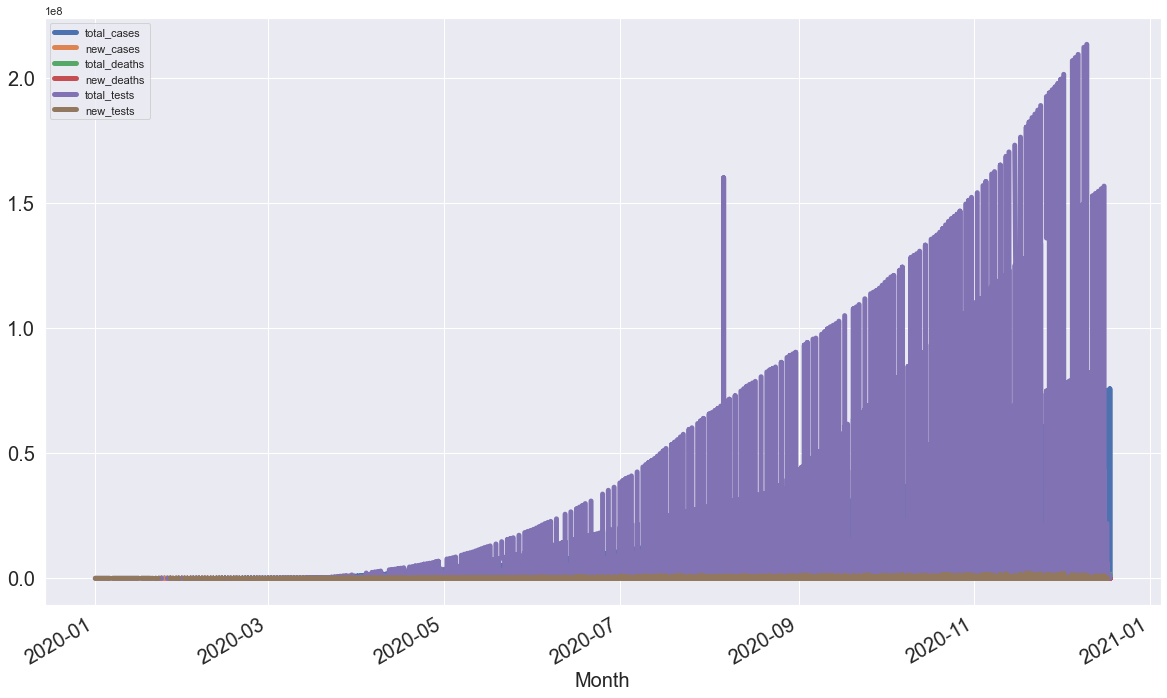

In [11]:
#ploting the data we created.
covid_data1.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

We see that there is a tremendous increase in the trends for all cases (test or deaths).

Text(0.5, 0, 'Month')

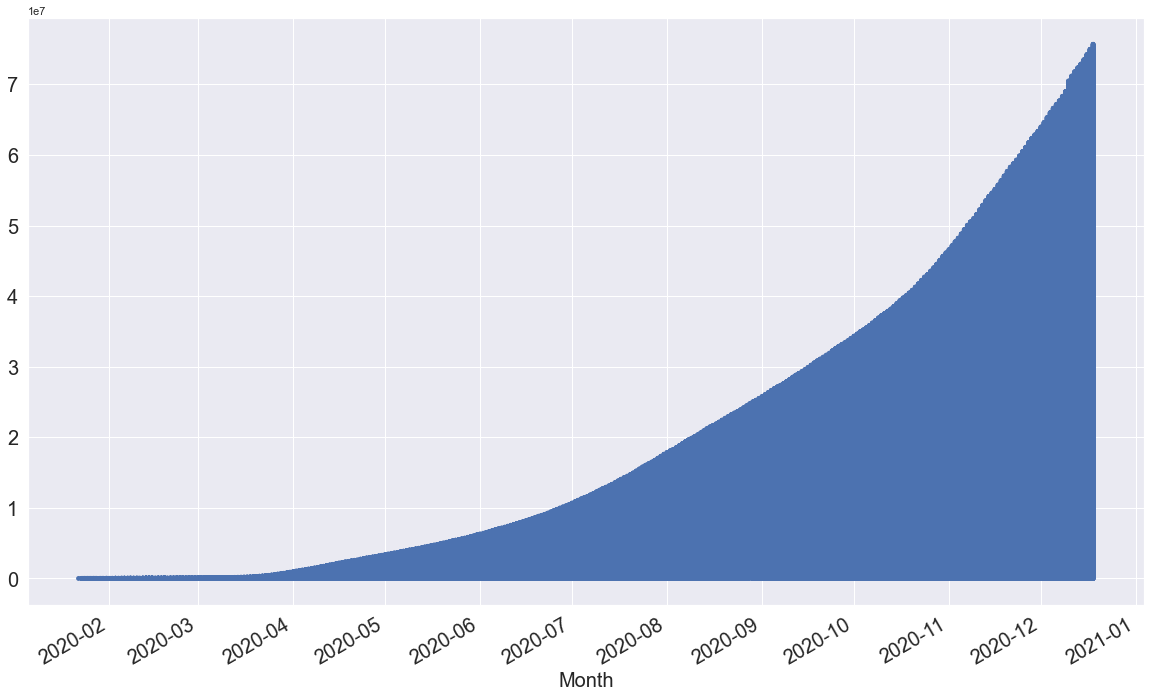

In [12]:
#ploting data of total cases
covid_data1.total_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

Cases have increased expotentilly.

Text(0.5, 0, 'Month')

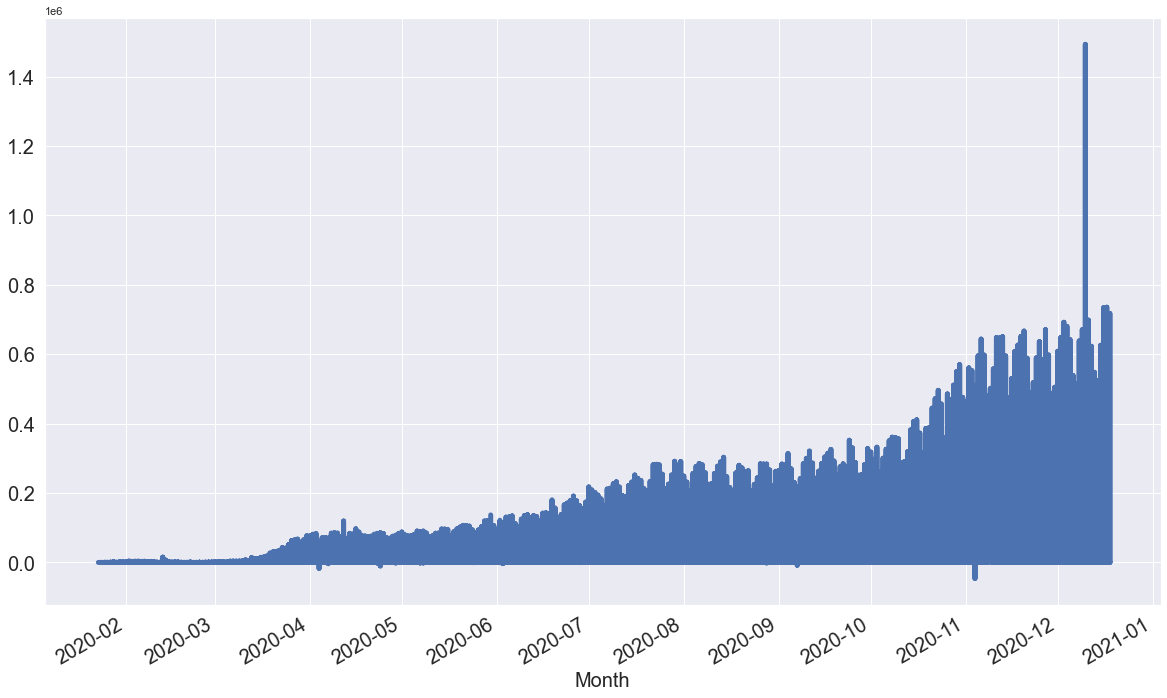

In [13]:
#ploting data of new cases
covid_data1.new_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

There was a steep increase in cases towards the end of 2020.

Text(0.5, 0, 'Month')

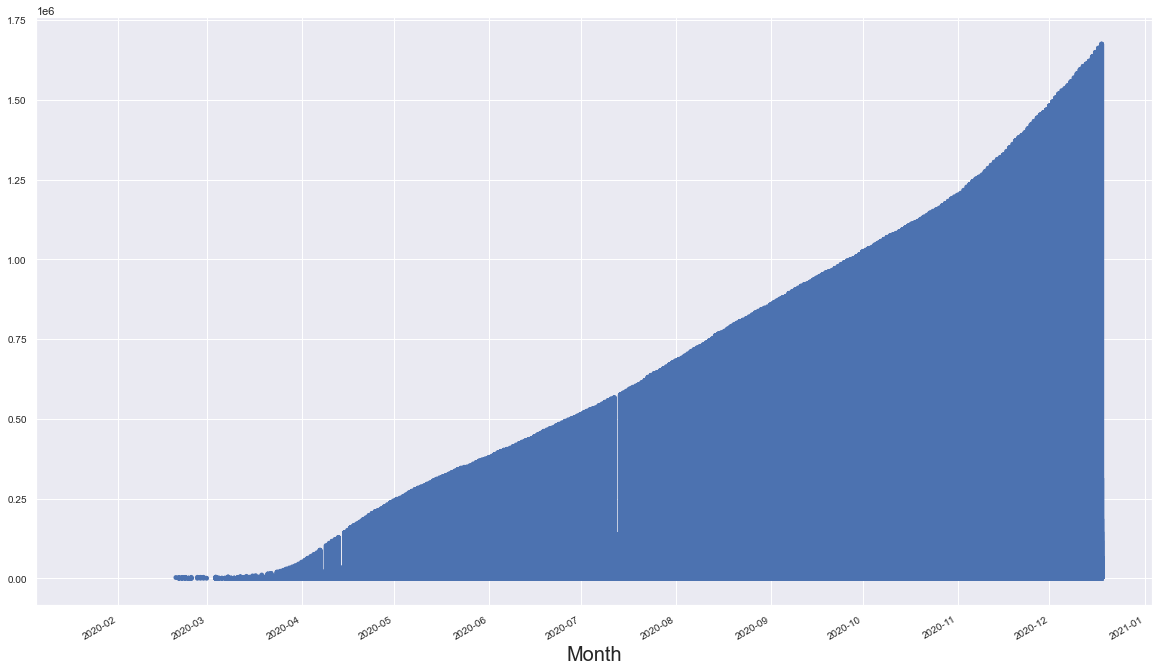

In [15]:
#ploting data of total deaths
covid_data1.total_deaths.plot(figsize=(20,12),linewidth=5,fontsize=10)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

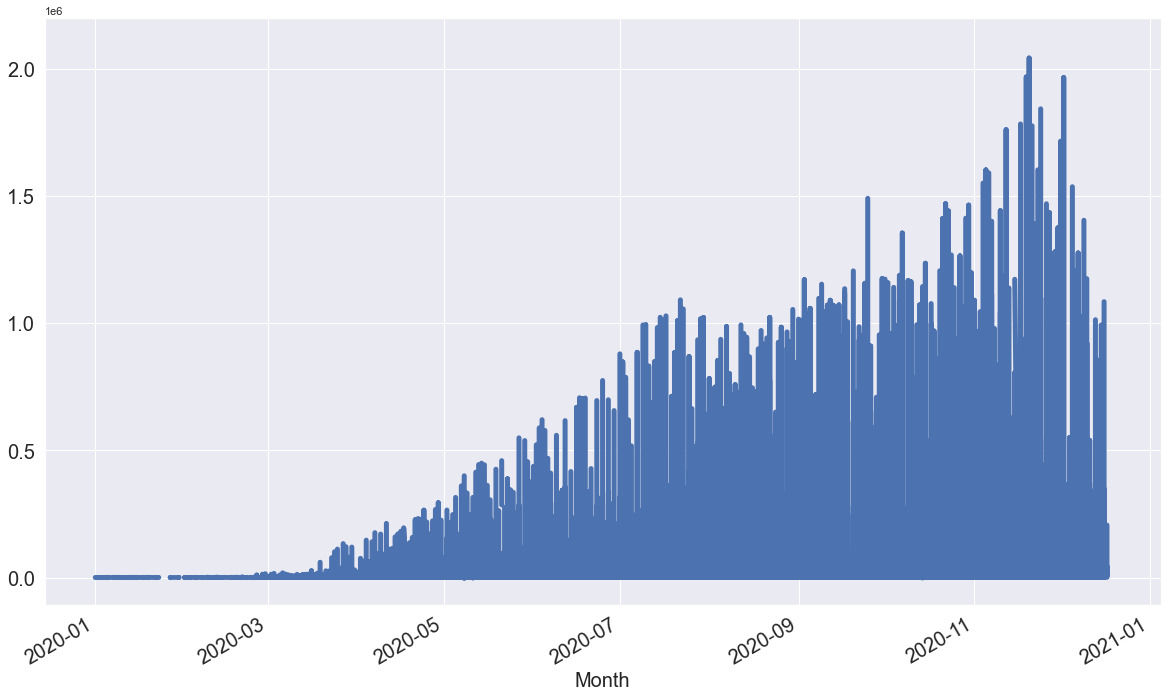

In [16]:
#ploting data of new tests
covid_data1.new_tests.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

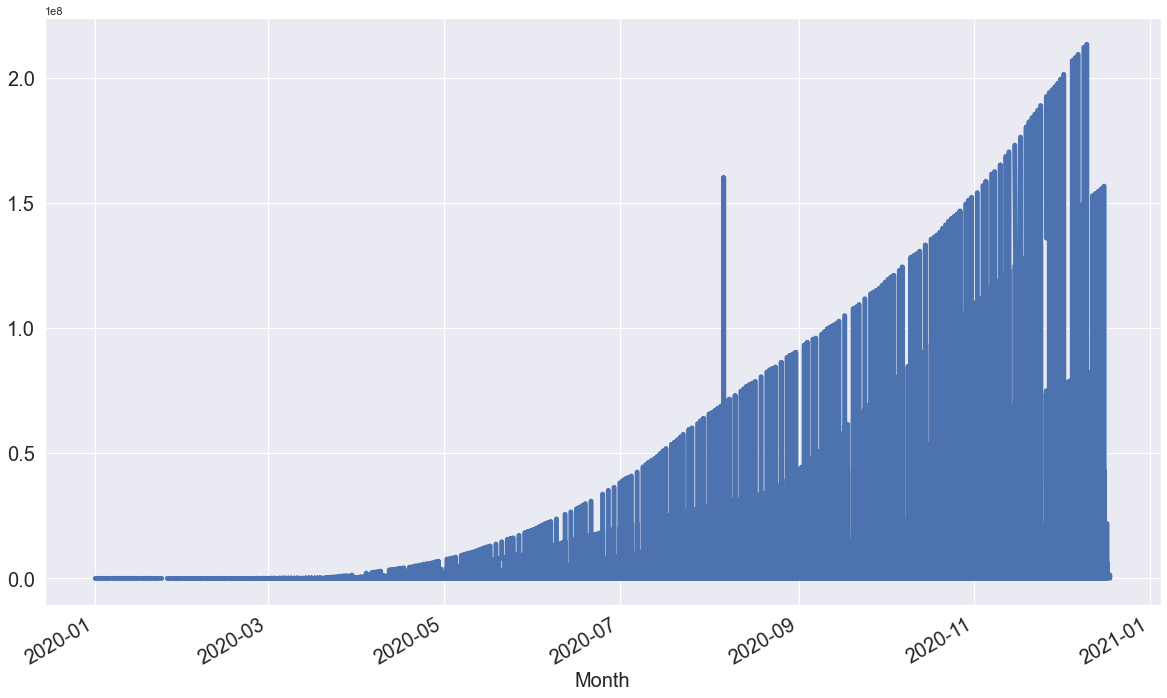

In [17]:
#ploting data of total tests done
covid_data1.total_tests.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

# Trends in TimeSeries Data

Text(0.5, 0, 'Months')

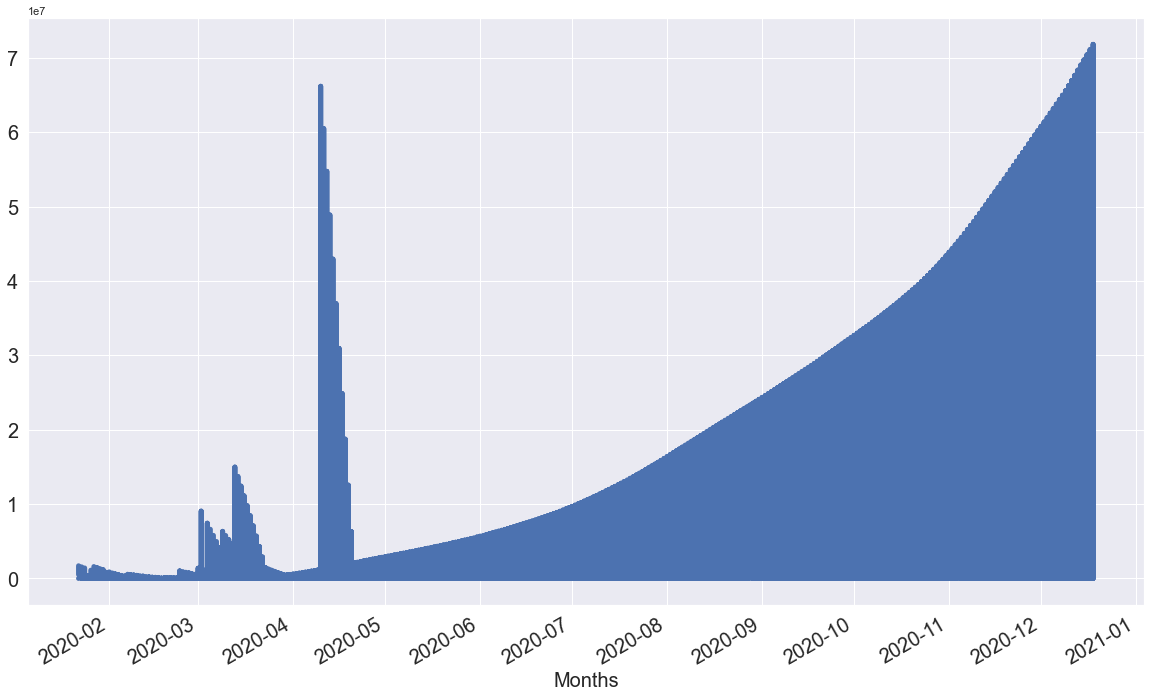

In [41]:
total_cases= covid_data1.total_cases
total_cases.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

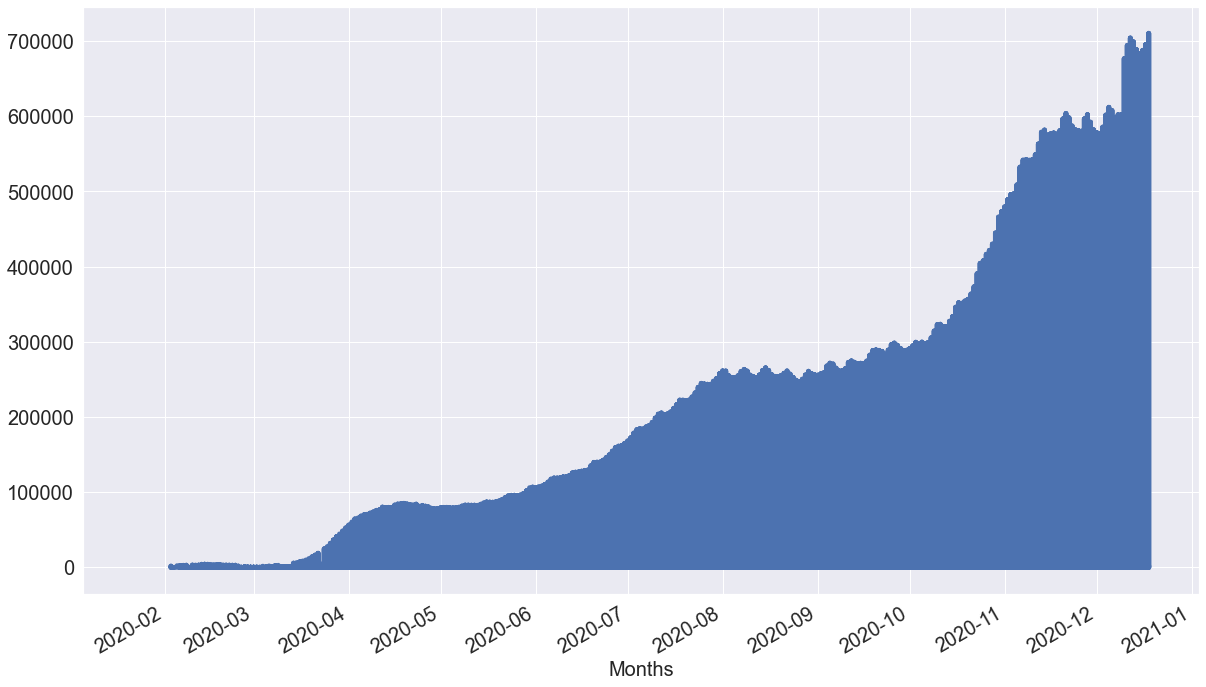

In [42]:
new_cases= covid_data1.new_cases
new_cases.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

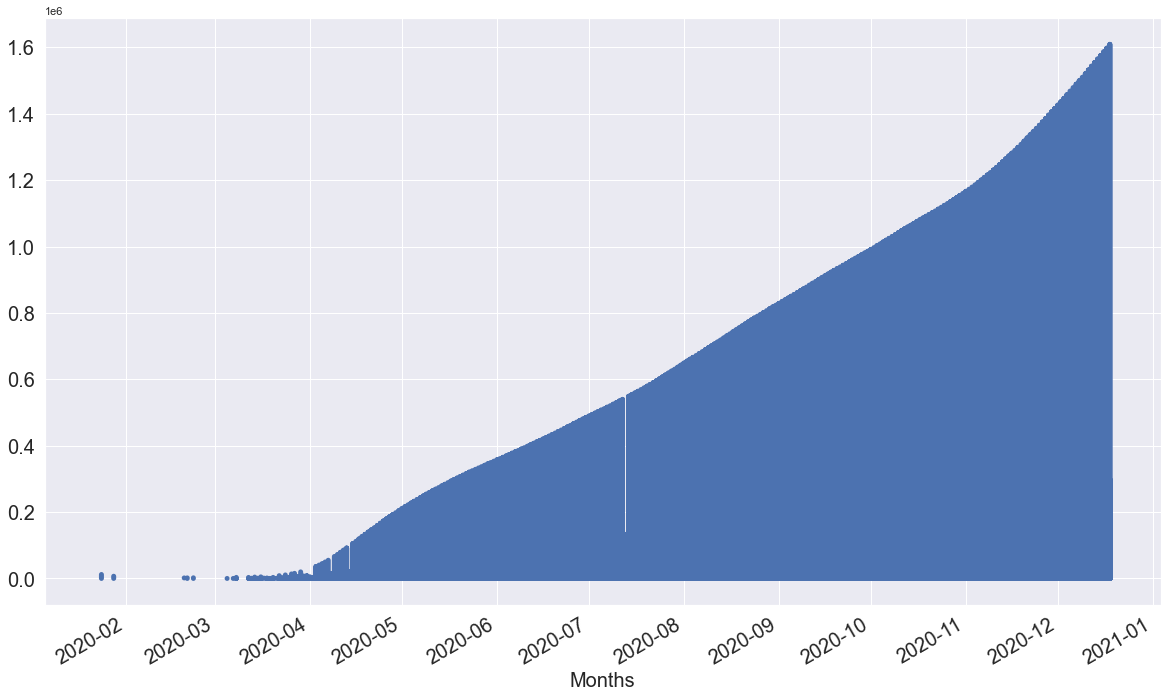

In [43]:
total_deaths= covid_data1.total_deaths
total_deaths.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

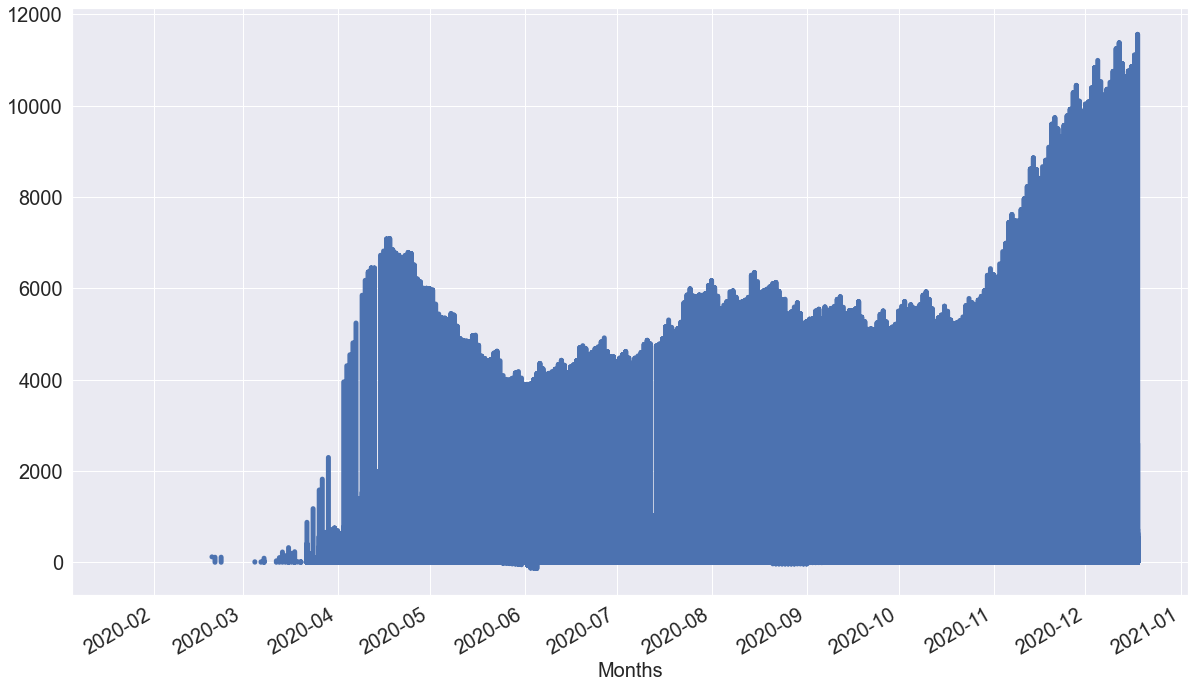

In [44]:
new_deaths= covid_data1.new_deaths
new_deaths.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

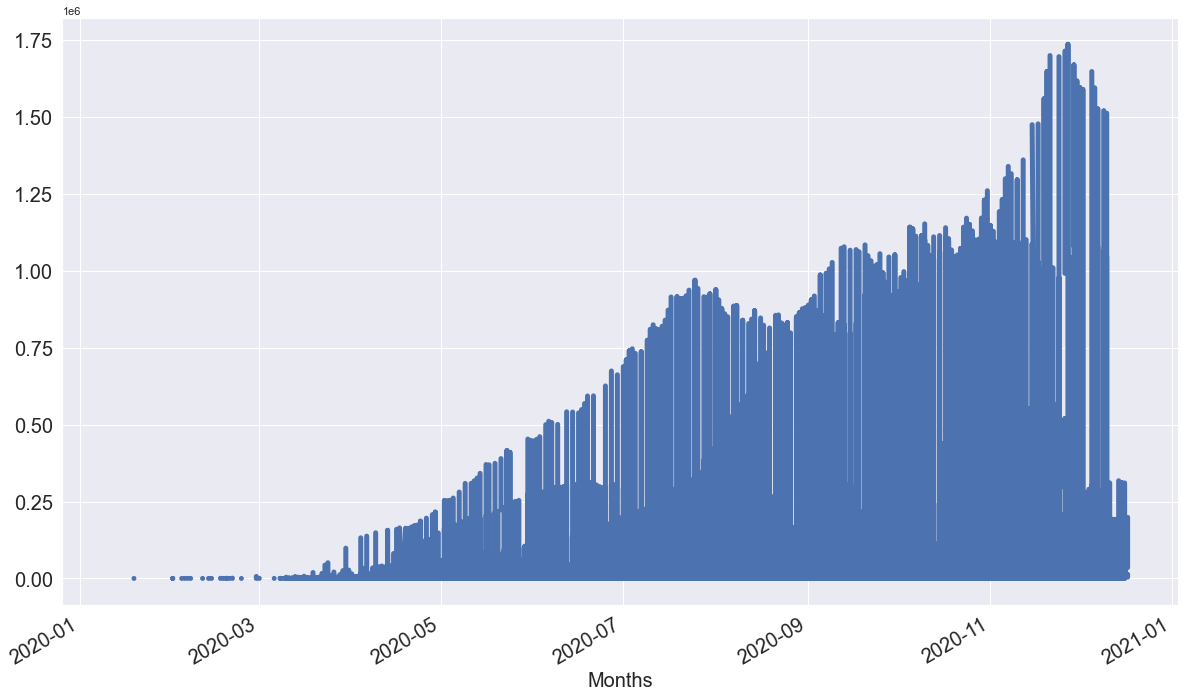

In [45]:
new_tests= covid_data1.new_tests
new_tests.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

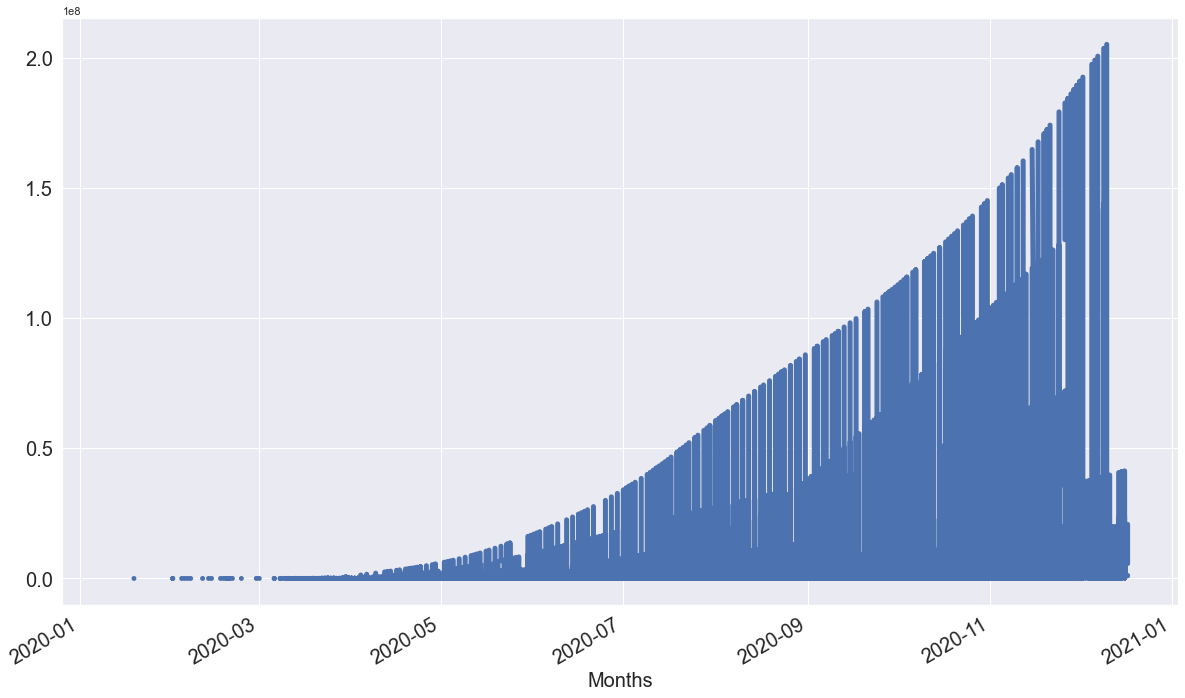

In [46]:
total_tests= covid_data1.total_tests
total_tests.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

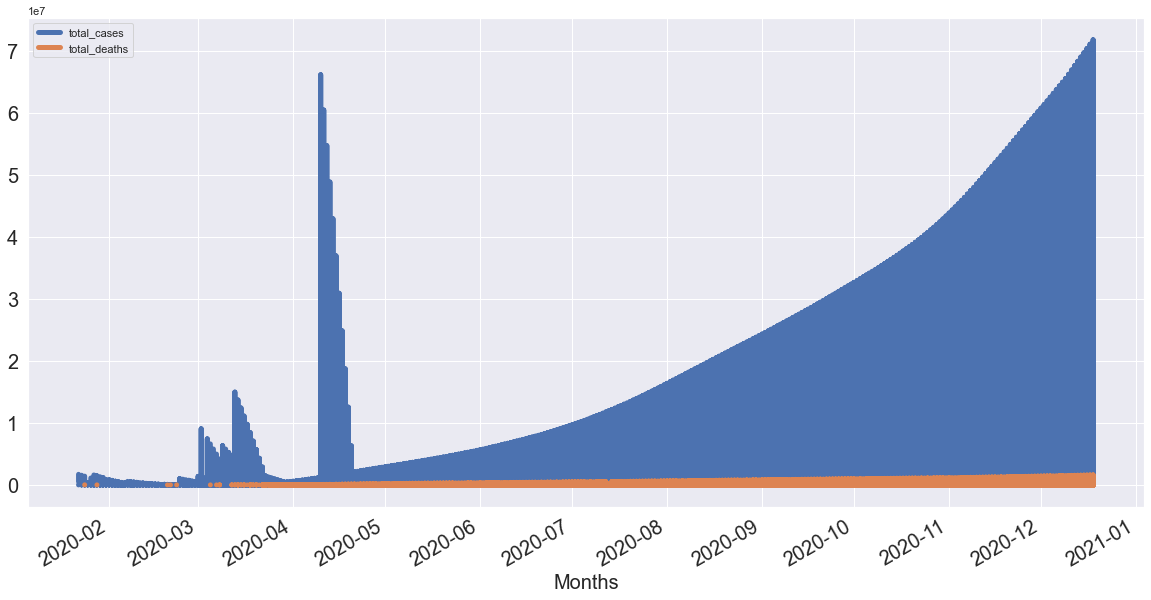

In [48]:
df_rm=pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean()],axis=1)
df_rm.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Months' , fontsize = 20)

# Seasonality in TimeSeries DataSet

Text(0.5, 0, 'Months')

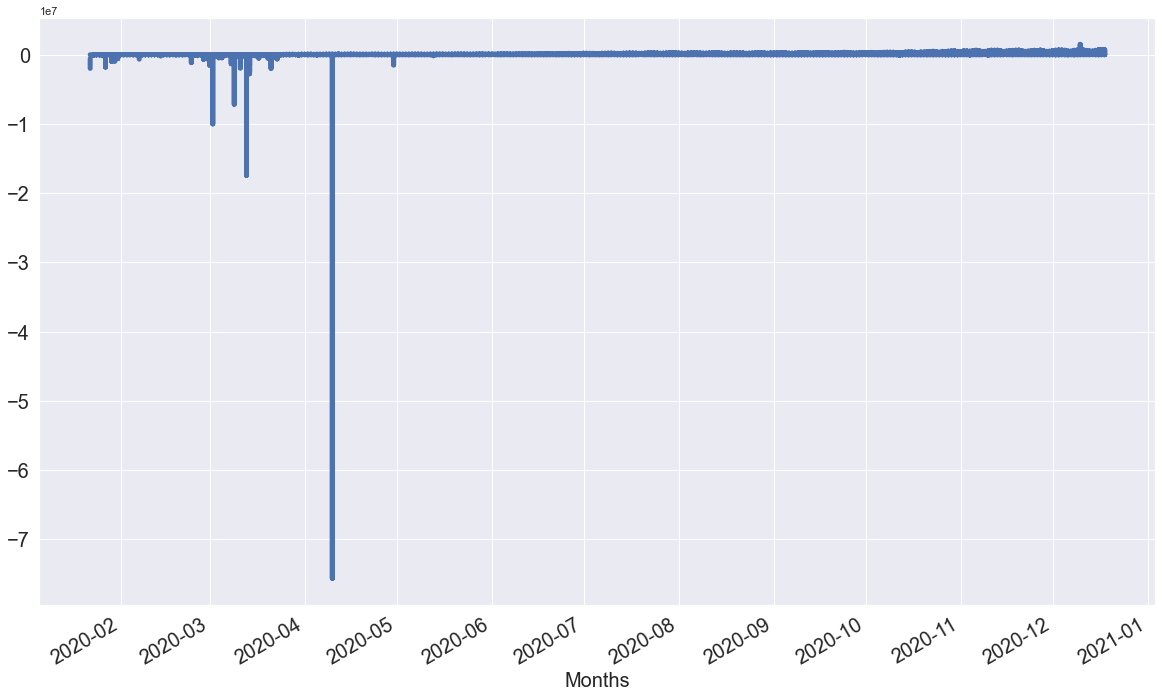

In [50]:
total_cases.diff().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Months', fontsize = 20)